In [2]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest# 환경 설정

import matplotlib
# 한글 설치(윈도우 버전)
matplotlib.rc('font',family='Malgun Gothic')
# 음수 표시
matplotlib.rc('axes',unicode_minus=False)
# 그래프 출력
%matplotlib inline

# 실행결과 경고메시지 출력 제외
import warnings
warnings.filterwarnings('ignore')

In [268]:
df = pd.read_csv('project3_완성본.csv')
# 첫 번째 중복된 행을 유지하고 나머지 삭제
df = df.drop_duplicates(keep='first')
df

,회원번호,회원상태,구매수량,구매금액,주문일시,배송시작일,배송완료일,사용 적립금,주문취소여부,주문시간,...,신선여부,개당 구매금액,물품금액,가격대,고객분류,연령대,이탈위험고객,R,Cluster,Cluster_1
0,1032097472,정상회원,1.0,7083,2022-01-08,-,-,0,주문취소,오후 01:00,...,신선,7083.0,9923,저가,일반,30대,0.0,8.0,0.0,주기적구매
1,1032097472,정상회원,1.0,10338,2022-09-16,2022-09-17 00:00:00,2022-09-18 00:00:00,0,주문완료,오후 10:01,...,신선,10338.0,9923,저가,일반,30대,0.0,8.0,0.0,주기적구매
2,1032097472,정상회원,1.0,10338,2022-06-18,2022-06-18 00:00:00,2022-06-18 00:00:00,0,주문완료,오후 08:00,...,신선,10338.0,9923,저가,일반,30대,0.0,8.0,0.0,주기적구매
3,1032097472,정상회원,1.0,10338,2022-04-02,2022-04-02 00:00:00,2022-04-02 00:00:00,0,주문완료,오후 07:40,...,신선,10338.0,9923,저가,일반,30대,0.0,8.0,0.0,주기적구매
4,1032097472,정상회원,1.0,8615,2022-05-07,2022-05-07 00:00:00,2022-05-08 00:00:00,0,주문완료,오후 03:29,...,신선,8615.0,9923,저가,일반,30대,0.0,8.0,0.0,주기적구매
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661915,734192768,정상회원,1.0,30631,2022-05-01,2022-05-02 00:00:00,2022-05-03 00:00:00,0,주문완료,오전 12:40,...,비신선,30631.0,30631,고가,일반,30대,0.0,13.0,0.0,주기적구매
661916,1352610112,정상회원,1.0,122523,2022-10-31,2022-10-31 00:00:00,2022-10-31 00:00:00,0,주문완료,오전 02:26,...,비신선,122523.0,122523,고가,일반,20대,0.0,2.0,0.0,주기적구매
661917,1556603072,정상회원,1.0,56475,2022-10-29,2022-10-29 00:00:00,2022-10-31 00:00:00,0,주문완료,오전 08:02,...,신선,56475.0,56475,고가,일반,40대,0.0,8.0,0.0,주기적구매
661918,686955712,정상회원,1.0,109122,2022-06-12,2022-06-13 00:00:00,2022-06-13 00:00:00,0,주문완료,오전 08:51,...,비신선,109122.0,109122,고가,일반,60대,0.0,46.0,0.0,주기적구매


#### 물품별 - 재구매 잦은 물품

'진간장' 품목이 2022년 10월 데이터에 없습니다.


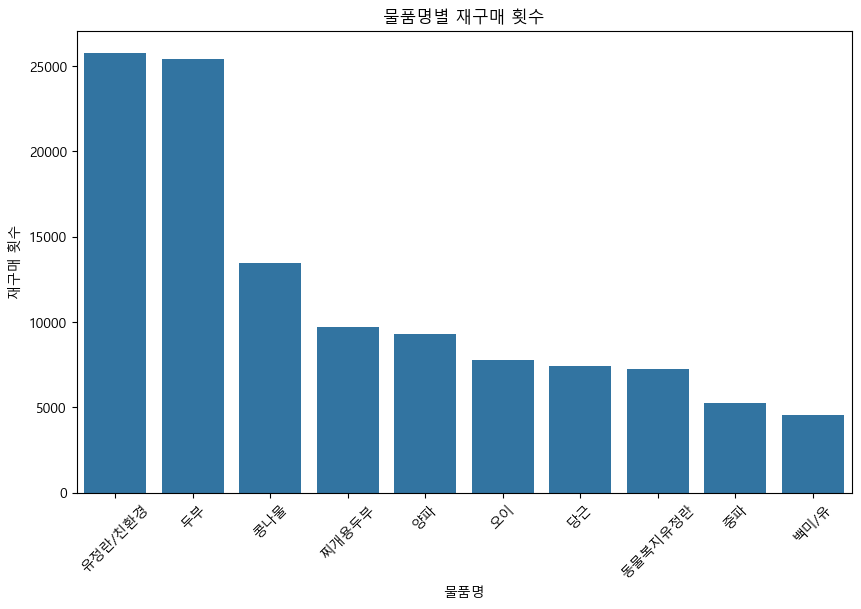

In [270]:
# 유효 주문만 선택 (주문취소 제외)
df_valid = df[df['주문취소여부'] == '주문완료']

# 물품명별 재구매 횟수 계산
reorder_counts = df_valid['물품명'].value_counts().reset_index().head(10)
reorder_counts.columns = ['물품명', '재구매횟수']

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=reorder_counts, x='물품명', y='재구매횟수')
plt.xlabel('물품명')
plt.ylabel('재구매 횟수')
plt.title('물품명별 재구매 횟수')
plt.xticks(rotation=45)
plt.show()

In [109]:
df_filtered = df[df['주문취소여부']=='주문완료']

df_filtered = df_filtered.drop_duplicates(subset=['회원번호','주문일시'])

order_counts = df_filtered.groupby(['회원번호','물품명']).size().reset_index(name='주문수')

order_counts['재구매율'] = order_counts['주문수'].apply(lambda x:1 if x> 1 else 0)

rebuy_rate = order_counts.groupby('물품명')['재구매율'].mean().reset_index()

rebuy_rate_sorted = rebuy_rate.sort_values(by='재구매율', inplace=False, ascending=False)
rebuy_rate_sorted.head(30)

,물품명,재구매율
669,삼치,1.000000
1332,초절임고추,1.000000
72,고구마묵,1.000000
837,스마트쿡냄비세트,1.000000
1107,유정란/친환경,0.677218
926,야콘즙,0.666667
81,고들빼기김치,0.666667
331,두부,0.643641
908,알로에/베라,0.600000
574,보쌈용돼지고기,0.500000


In [143]:
import pandas as pd

# 주문취소가 아닌 데이터 필터링
df_filtered = df[df['주문취소여부'] == '주문완료']

# 중복 주문 제거
df_filtered = df_filtered.drop_duplicates(subset=['회원번호', '주문일시','물품명'])

# 회원번호와 물품명별 주문 횟수 계산
order_counts = df_filtered.groupby(['회원번호', '물품명']).size().reset_index(name='주문수')

# 재구매 여부 계산 (주문수가 1보다 크면 재구매로 간주)
order_counts['재구매여부'] = order_counts['주문수'].apply(lambda x: 1 if x > 1 else 0)

# 물품명별 재구매율과 재구매 횟수 계산
rebuy_stats = order_counts.groupby('물품명').agg(
    재구매율=('재구매여부', 'mean'),
    재구매횟수=('주문수', lambda x: (x > 1).sum()),
    전체구매횟수=('주문수', 'sum')  # 전체 구매횟수 추가
).reset_index()

# 재구매 주기 계산 (1 / 재구매율)
rebuy_stats['재구매주기'] = (1 / rebuy_stats['재구매율']).apply(lambda x: round(x, 2))

# 재구매율로 정렬
rebuy_stats_sorted = rebuy_stats.sort_values(by='재구매율', ascending=False)
rebuy_stats_sorted2 = rebuy_stats.sort_values(by='재구매횟수', ascending=False)
# 상위 30개 출력
rebuy_stats_sorted.head(30)


,물품명,재구매율,재구매횟수,전체구매횟수,재구매주기
1178,오가닉코튼선물상자,1.000000,1,2,1.00
1208,옥돔선물모음,1.000000,1,2,1.00
1216,옹기1호,1.000000,1,2,1.00
1287,유기 어린이수저세트,1.000000,1,2,1.00
1730,한결홍옥고환,1.000000,1,3,1.00
1687,편백나무큐브목베개모음,1.000000,1,2,1.00
1331,유정란/친환경,0.677218,3573,25509,1.48
948,수피아 내츄럴 수분채움 2종모음,0.666667,2,5,1.50
908,소망 꿀초,0.666667,2,5,1.50
401,두부,0.661738,3670,25160,1.51


#### 1) 재구매율 계산:

- 특정 물품을 한 번 이상 구매한 고객 수 대비 두 번 이상 구매한 고객 수의 비율을 구합니다.예를 들어, 100명이 특정 물품을 구매했는데 그 중 60명이 다시 구매했다면, 재구매율은 60/100=0.6

#### 2)재구매주기 계산:

- 재구매율의 역수를 계산합니다. 재구매율이 r일 때, 재구매주기는 1/r로 계산됩니다.
- 재구매율이 0.6이면, 재구매주기는 1/0.6=1.67이는 평균적으로 약 1.67번의 구매 중 한 번은 재구매가 일어난다는 뜻입니다.


### 재구매주기로 무엇을 도출할 수 있을까


In [145]:
rebuy_stats_sorted2.head(30)

,물품명,재구매율,재구매횟수,전체구매횟수,재구매주기
401,두부,0.661738,3670,25160,1.51
1331,유정란/친환경,0.677218,3573,25509,1.48
1616,콩나물,0.577880,2508,13383,1.73
1120,양파,0.552007,1884,9267,1.81
1499,찌개용두부,0.545427,1771,9676,1.83
376,동물복지유정란,0.487570,1569,7191,2.05
343,당근,0.505810,1567,7364,1.98
1197,오이,0.522906,1461,7693,1.91
1474,중파,0.483485,1171,5243,2.07
355,대파,0.425703,954,4134,2.35


In [163]:
# 전체구매횟수가 100 이상인 데이터 필터링
filtered_df = rebuy_stats[rebuy_stats['전체구매횟수'] > 100]

# 재구매율 기준으로 오름차순 정렬
sorted_df = filtered_df.sort_values(by='재구매율', ascending=True)
sorted_df.head(10)

,물품명,재구매율,재구매횟수,전체구매횟수,재구매주기
1810,햇멸치,0.016216,3,188,61.67
44,감자전분,0.019608,2,104,51.00
254,냉동흑미녹두송편,0.023810,3,129,42.00
1436,재래종중파,0.030612,3,101,32.67
166,긁지말고 모물린,0.032407,7,224,30.86
936,수수/무,0.040936,7,181,24.43
1446,절단무,0.041096,6,152,24.33
161,귤/무,0.042056,9,224,23.78
1886,황토쥐눈이콩콩나물,0.042169,7,173,23.71
13,가지말림,0.042683,7,174,23.43


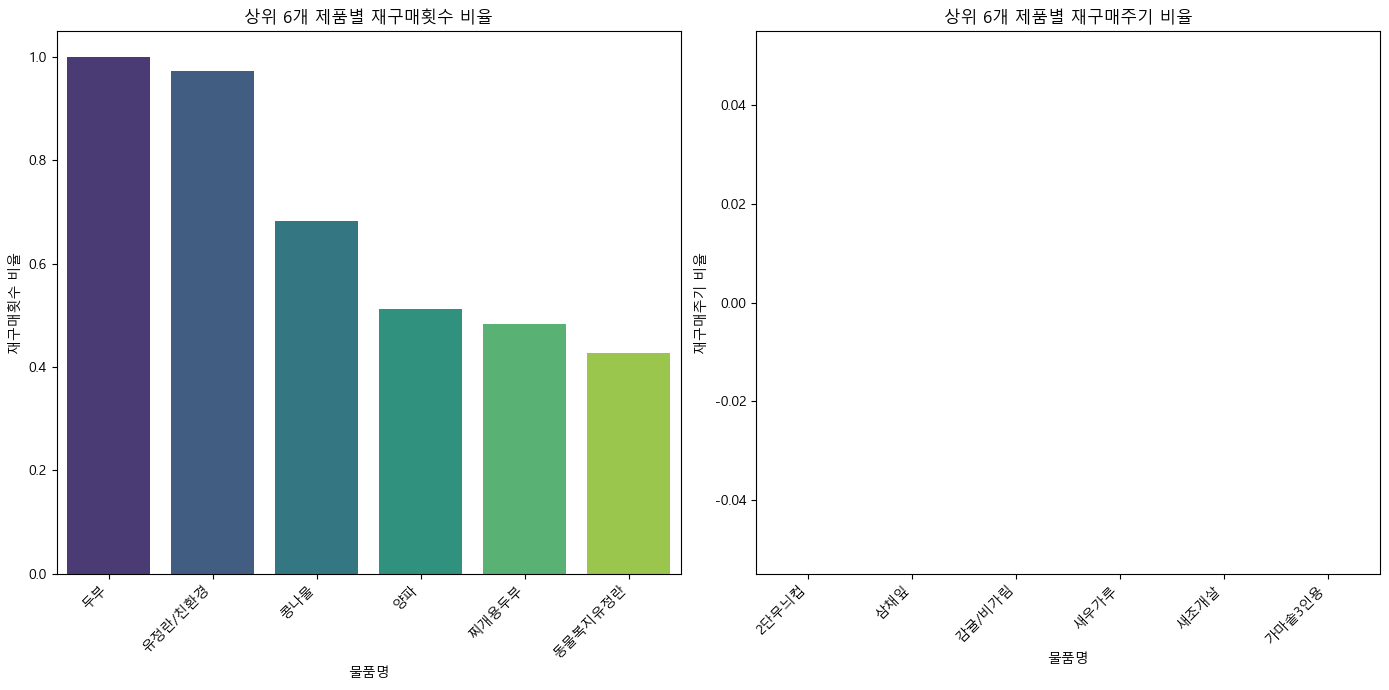

In [149]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns





# 상위 6개 항목으로 필터링 (유정란/친환경부터 오이까지)
filtered_data = rebuy_stats_sorted

# 비율 계산
filtered_data['재구매횟수 비율'] = filtered_data['재구매횟수'] / filtered_data['재구매횟수'].max()
filtered_data['재구매주기 비율'] = filtered_data['재구매주기'] / filtered_data['재구매주기'].max()

# 재구매횟수와 재구매주기 기준으로 정렬
top_by_rebuy_counts = filtered_data.sort_values(by='재구매횟수', ascending=False).head(6)
top_by_rebuy_periods = filtered_data.sort_values(by='재구매주기', ascending=False).head(6)

# 그래프 설정
plt.figure(figsize=(14, 7))

# 재구매횟수 비율
plt.subplot(1, 2, 1)
sns.barplot(x='물품명', y='재구매횟수 비율', data=top_by_rebuy_counts, palette='viridis')
plt.xlabel('물품명')
plt.ylabel('재구매횟수 비율')
plt.title('상위 6개 제품별 재구매횟수 비율')
plt.xticks(rotation=45, ha='right')

# 재구매주기 비율
plt.subplot(1, 2, 2)
sns.barplot(x='물품명', y='재구매주기 비율', data=top_by_rebuy_periods, palette='viridis')
plt.xlabel('물품명')
plt.ylabel('재구매주기 비율')
plt.title('상위 6개 제품별 재구매주기 비율')
plt.xticks(rotation=45, ha='right')
plt.ylim(0.5,1.2)

# 그래프 레이아웃 조정 및 표시
plt.tight_layout()
plt.show()


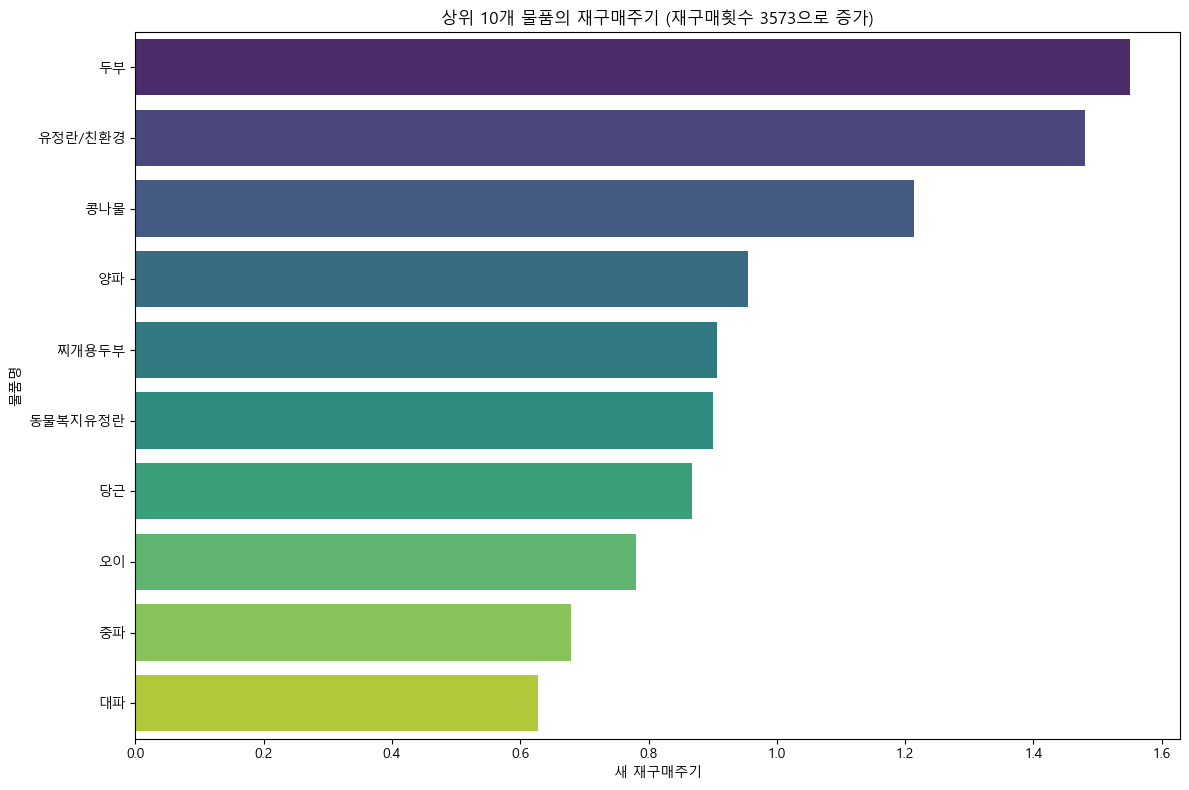

          물품명    새 재구매율  재구매횟수   새 재구매주기
401        두부  0.644248   3670  1.550994
1331  유정란/친환경  0.677218   3573  1.480000
1616      콩나물  0.823272   2508  1.214341
1120       양파  1.046880   1884  0.954391
1499    찌개용두부  1.100400   1771  0.907061
376   동물복지유정란  1.110317   1569  0.900210
343        당근  1.153325   1567  0.868363
1197       오이  1.278812   1461  0.780999
1474       중파  1.475227   1171  0.678413
355        대파  1.594378    954  0.627456


In [153]:
# 새 재구매횟수 --=-->의미없음
new_rebuy_count = 3573

# 재구매율과 재구매주기 계산
rebuy_stats_sorted['새 재구매율'] = rebuy_stats_sorted['재구매율'] * (new_rebuy_count / rebuy_stats_sorted['재구매횟수'])
rebuy_stats_sorted['새 재구매주기'] = rebuy_stats_sorted['재구매주기'] * (rebuy_stats_sorted['재구매횟수'] / new_rebuy_count)

# 결과 테이블
df_result = rebuy_stats_sorted[['물품명', '새 재구매율', '재구매횟수', '새 재구매주기']]

# 재구매주기를 기준으로 하위 10개 항목 선택
df_sorted = df_result.sort_values(by='새 재구매주기',ascending=False).head(10)

# 그래프 설정
plt.figure(figsize=(12, 8))

# 재구매주기 시각화
sns.barplot(x='새 재구매주기', y='물품명', data=df_sorted, palette='viridis')

# 그래프 레이블 및 제목 설정
plt.xlabel('새 재구매주기')
plt.ylabel('물품명')
plt.title('상위 10개 물품의 재구매주기 (재구매횟수 3573으로 증가)')
plt.tight_layout()
plt.show()

# 결과 테이블 출력
print(df_sorted)

In [273]:

# 주문취소가 아닌 데이터 필터링
df_filtered = df[(df['주문취소여부'] == '주문완료') & (df['고객분류'] == '일반')]

# 중복 주문 제거
df_filtered = df_filtered.drop_duplicates(subset=['회원번호', '주문일시', '물품명'])

# 회원번호와 물품명별 주문 횟수 계산
order_counts = df_filtered.groupby(['회원번호', '물품명']).size().reset_index(name='주문수')

# 재구매 여부 계산 (주문수가 1보다 크면 재구매로 간주)
order_counts['재구매여부'] = order_counts['주문수'].apply(lambda x: 1 if x > 1 else 0)

# 물품명별 재구매율과 재구매 횟수 계산
rebuy_stats = order_counts.groupby('물품명').agg(
    재구매율=('재구매여부', 'mean'),
    재구매횟수=('주문수', lambda x: (x > 1).sum()),
    전체구매횟수=('주문수', 'sum')  # 전체 구매횟수 추가
).reset_index()

# 원본 데이터와 결합하여 추가 정보 포함
rebuy_stats = rebuy_stats.merge(df[['물품명', '물품대분류', '물품중분류', '식품/비식품', '신선여부']].drop_duplicates(), on='물품명', how='left')

# 식품/비식품이 식품이고 냉장여부가 냉장인 것만 필터링
rebuy_stats_filtered = rebuy_stats[(rebuy_stats['식품/비식품'] == '식품') & (rebuy_stats['신선여부'] == '신선')]

# 재구매 주기 계산 (1 / 재구매율)
rebuy_stats_filtered['재구매주기'] = (1 / rebuy_stats_filtered['재구매율']).apply(lambda x: round(x, 2))

# 결과 출력
rebuy_stats_filtered.sort_values(by='전체구매횟수',ascending=False).head(10)


,물품명,재구매율,재구매횟수,전체구매횟수,물품대분류,물품중분류,식품/비식품,신선여부,재구매주기
378,두부,0.587576,2516,14364,두부/유부,두부,식품,신선,1.70
1260,유정란/친환경,0.587897,2351,13061,알,논지엠오유정란,식품,신선,1.70
1537,콩나물,0.494055,1579,7538,콩나물,콩나물,식품,신선,2.02
1422,찌개용두부,0.479588,1163,5923,두부/유부,두부,식품,신선,2.09
1071,양파,0.423514,969,4383,양념채소,양파,식품,신선,2.36
353,동물복지유정란,0.408650,926,4262,알,유정란,식품,신선,2.45
320,당근,0.394469,813,3815,뿌리채소,당근,식품,신선,2.54
1137,오이,0.391353,697,3335,열매채소,오이,식품,신선,2.56
1399,중파,0.360299,530,2450,양념채소,중파,식품,신선,2.78
636,백미/유,0.413043,494,2307,멥쌀,멥쌀,식품,신선,2.42


In [275]:

# 주문취소가 아닌 데이터 필터링
df_filtered = df[(df['주문취소여부'] == '주문완료') & (df['고객분류'] == 'VIP')]

# 중복 주문 제거
df_filtered = df_filtered.drop_duplicates(subset=['회원번호', '주문일시', '물품명'])

# 회원번호와 물품명별 주문 횟수 계산
order_counts = df_filtered.groupby(['회원번호', '물품명']).size().reset_index(name='주문수')

# 재구매 여부 계산 (주문수가 1보다 크면 재구매로 간주)
order_counts['재구매여부'] = order_counts['주문수'].apply(lambda x: 1 if x > 1 else 0)

# 물품명별 재구매율과 재구매 횟수 계산
rebuy_stats = order_counts.groupby('물품명').agg(
    재구매율=('재구매여부', 'mean'),
    재구매횟수=('주문수', lambda x: (x > 1).sum()),
    전체구매횟수=('주문수', 'sum')  # 전체 구매횟수 추가
).reset_index()

# 원본 데이터와 결합하여 추가 정보 포함
rebuy_stats = rebuy_stats.merge(df[['물품명', '물품대분류', '물품중분류', '식품/비식품', '신선여부']].drop_duplicates(), on='물품명', how='left')

# 식품/비식품이 식품이고 냉장여부가 냉장인 것만 필터링
rebuy_stats_filtered = rebuy_stats[(rebuy_stats['식품/비식품'] == '식품') & (rebuy_stats['신선여부'] == '신선')]

# 재구매 주기 계산 (1 / 재구매율)
rebuy_stats_filtered['재구매주기'] = (1 / rebuy_stats_filtered['재구매율']).apply(lambda x: round(x, 2))

# 결과 출력
rebuy_stats_filtered.sort_values(by='전체구매횟수',ascending=False).head(10)


,물품명,재구매율,재구매횟수,전체구매횟수,물품대분류,물품중분류,식품/비식품,신선여부,재구매주기
1277,유정란/친환경,0.956930,1222,12448,알,논지엠오유정란,식품,신선,1.05
386,두부,0.912975,1154,10796,두부/유부,두부,식품,신선,1.10
1553,콩나물,0.812063,929,5845,콩나물,콩나물,식품,신선,1.23
1075,양파,0.813333,915,4884,양념채소,양파,식품,신선,1.23
1151,오이,0.754195,764,4358,열매채소,오이,식품,신선,1.33
1440,찌개용두부,0.739659,608,3753,두부/유부,두부,식품,신선,1.35
330,당근,0.727097,754,3549,뿌리채소,당근,식품,신선,1.38
361,동물복지유정란,0.675420,643,2929,알,유정란,식품,신선,1.48
1417,중파,0.674027,641,2793,양념채소,중파,식품,신선,1.48
1258,유기농우유,0.623457,303,2259,유제품,우유/산양유,식품,신선,1.60


In [280]:

# 주문취소가 아닌 데이터 필터링
df_filtered = df[(df['주문취소여부'] == '주문완료') & (df['고객분류'] == 'VIP')]

# 중복 주문 제거
df_filtered = df_filtered.drop_duplicates(subset=['회원번호', '주문일시', '물품명'])

# 회원번호와 물품명별 주문 횟수 계산
order_counts = df_filtered.groupby(['회원번호', '물품명']).size().reset_index(name='주문수')

# 재구매 여부 계산 (주문수가 1보다 크면 재구매로 간주)
order_counts['재구매여부'] = order_counts['주문수'].apply(lambda x: 1 if x > 1 else 0)

# 물품명별 재구매율과 재구매 횟수 계산
rebuy_stats = order_counts.groupby('물품명').agg(
    재구매율=('재구매여부', 'mean'),
    재구매횟수=('주문수', lambda x: (x > 1).sum()),
    전체구매횟수=('주문수', 'sum')  # 전체 구매횟수 추가
).reset_index()

# 원본 데이터와 결합하여 추가 정보 포함
rebuy_stats = rebuy_stats.merge(df[['물품명', '물품대분류', '물품중분류', '식품/비식품', '신선여부']].drop_duplicates(), on='물품명', how='left')

# 식품/비식품이 식품이고 냉장여부가 냉장인 것만 필터링
rebuy_stats_filtered = rebuy_stats[(rebuy_stats['식품/비식품'] == '식품') & (rebuy_stats['신선여부'] == '비신선')]

# 재구매 주기 계산 (1 / 재구매율)
rebuy_stats_filtered['재구매주기'] = (1 / rebuy_stats_filtered['재구매율']).apply(lambda x: round(x, 2))

# 결과 출력
rebuy_stats_filtered.sort_values(by='전체구매횟수',ascending=False).head(10)


,물품명,재구매율,재구매횟수,전체구매횟수,물품대분류,물품중분류,식품/비식품,신선여부,재구매주기
125,구운도시락김,0.597122,249,1495,밑반찬,김가공,식품,비신선,1.67
297,단무지,0.486922,242,1096,절임/장아찌,절임,식품,비신선,2.05
265,누룽지,0.558405,196,995,과자,스낵,식품,비신선,1.79
1755,현미유,0.523715,265,968,기름/식초,기름,식품,비신선,1.91
38,감자라면,0.563636,186,944,밀가공,라면,식품,비신선,1.77
1088,얼음식혜,0.522727,184,912,음료,음료기타,식품,비신선,1.91
1459,참기름,0.472284,213,907,기름/식초,기름,식품,비신선,2.12
1157,오징어땅콩볼,0.471910,168,884,과자,스낵,식품,비신선,2.12
773,상큼한감귤&한라봉,0.577778,156,856,음료,과즙,식품,비신선,1.73
130,구운전장김,0.486395,143,825,밑반찬,김가공,식품,비신선,2.06


In [282]:

# 주문취소가 아닌 데이터 필터링
df_filtered = df[(df['주문취소여부'] == '주문완료') & (df['고객분류'] == '일반')]

# 중복 주문 제거
df_filtered = df_filtered.drop_duplicates(subset=['회원번호', '주문일시', '물품명'])

# 회원번호와 물품명별 주문 횟수 계산
order_counts = df_filtered.groupby(['회원번호', '물품명']).size().reset_index(name='주문수')

# 재구매 여부 계산 (주문수가 1보다 크면 재구매로 간주)
order_counts['재구매여부'] = order_counts['주문수'].apply(lambda x: 1 if x > 1 else 0)

# 물품명별 재구매율과 재구매 횟수 계산
rebuy_stats = order_counts.groupby('물품명').agg(
    재구매율=('재구매여부', 'mean'),
    재구매횟수=('주문수', lambda x: (x > 1).sum()),
    전체구매횟수=('주문수', 'sum')  # 전체 구매횟수 추가
).reset_index()

# 원본 데이터와 결합하여 추가 정보 포함
rebuy_stats = rebuy_stats.merge(df[['물품명', '물품대분류', '물품중분류', '식품/비식품', '신선여부']].drop_duplicates(), on='물품명', how='left')

# 식품/비식품이 식품이고 냉장여부가 냉장인 것만 필터링
rebuy_stats_filtered = rebuy_stats[(rebuy_stats['식품/비식품'] == '식품') & (rebuy_stats['신선여부'] == '비신선')]

# 재구매 주기 계산 (1 / 재구매율)
rebuy_stats_filtered['재구매주기'] = (1 / rebuy_stats_filtered['재구매율']).apply(lambda x: round(x, 2))

# 결과 출력
rebuy_stats_filtered.sort_values(by='전체구매횟수',ascending=False).head(10)


,물품명,재구매율,재구매횟수,전체구매횟수,물품대분류,물품중분류,식품/비식품,신선여부,재구매주기
290,단무지,0.310887,277,1374,절임/장아찌,절임,식품,비신선,3.22
262,누룽지,0.316689,241,1367,과자,스낵,식품,비신선,3.16
126,구운도시락김,0.379765,259,1339,밑반찬,김가공,식품,비신선,2.63
1743,현미유,0.263647,227,1191,기름/식초,기름,식품,비신선,3.79
761,상큼한감귤&한라봉,0.353519,216,1169,음료,과즙,식품,비신선,2.83
1084,얼음식혜,0.305866,219,1154,음료,음료기타,식품,비신선,3.27
413,딸기잼,0.259950,209,1131,잼/병조림/기타,잼,식품,비신선,3.85
125,구운김밥김,0.275524,197,1061,해조,김,식품,비신선,3.63
1442,참기름,0.255007,191,1045,기름/식초,기름,식품,비신선,3.92
40,감자라면,0.323049,178,912,밀가공,라면,식품,비신선,3.10


In [284]:

# 주문취소가 아닌 데이터 필터링
df_filtered = df[(df['주문취소여부'] == '주문완료') & (df['고객분류'] == 'VIP')]

# 중복 주문 제거
df_filtered = df_filtered.drop_duplicates(subset=['회원번호', '주문일시', '물품명'])

# 회원번호와 물품명별 주문 횟수 계산
order_counts = df_filtered.groupby(['회원번호', '물품명']).size().reset_index(name='주문수')

# 재구매 여부 계산 (주문수가 1보다 크면 재구매로 간주)
order_counts['재구매여부'] = order_counts['주문수'].apply(lambda x: 1 if x > 1 else 0)

# 물품명별 재구매율과 재구매 횟수 계산
rebuy_stats = order_counts.groupby('물품명').agg(
    재구매율=('재구매여부', 'mean'),
    재구매횟수=('주문수', lambda x: (x > 1).sum()),
    전체구매횟수=('주문수', 'sum')  # 전체 구매횟수 추가
).reset_index()

# 원본 데이터와 결합하여 추가 정보 포함
rebuy_stats = rebuy_stats.merge(df[['물품명', '물품대분류', '물품중분류', '식품/비식품', '신선여부']].drop_duplicates(), on='물품명', how='left')

# 식품/비식품이 식품이고 냉장여부가 냉장인 것만 필터링
rebuy_stats_filtered = rebuy_stats[(rebuy_stats['식품/비식품'] == '비식품') & (rebuy_stats['신선여부'] == '비신선')]

# 재구매 주기 계산 (1 / 재구매율)
rebuy_stats_filtered['재구매주기'] = (1 / rebuy_stats_filtered['재구매율']).apply(lambda x: round(x, 2))

# 결과 출력
rebuy_stats_filtered.sort_values(by='전체구매횟수',ascending=False).head(10)


,물품명,재구매율,재구매횟수,전체구매횟수,물품대분류,물품중분류,식품/비식품,신선여부,재구매주기
958,숲사랑 3겹둥근휴지,0.470790,137,563,생활용품,휴지,비식품,비신선,2.12
583,물사랑 주방용물비누,0.418685,121,551,세제/세안,주방용비누,비식품,비신선,2.39
1052,액상세제,0.572139,115,493,세제/세안,세탁비누,비식품,비신선,1.75
961,숲사랑 주방휴지,0.377451,77,357,생활용품,휴지,비식품,비신선,2.65
959,숲사랑 미용사각휴지,0.393064,68,334,생활용품,휴지,비식품,비신선,2.54
1289,이웃음칫솔,0.352941,66,327,생활용품,치약/칫솔,비식품,비신선,2.83
923,수피아 손세정제,0.449664,67,289,세제/세안,바디,비식품,비신선,2.22
924,수피아 쌀겨 마스크팩,0.484211,46,242,화장품,세안제/팩,비식품,비신선,2.07
600,미온,0.354430,56,242,전통주,리큐르/기타,비식품,비신선,2.82
587,물사랑치약,0.406780,48,202,생활용품,치약/칫솔,비식품,비신선,2.46


In [261]:

# 주문취소가 아닌 데이터 필터링
df_filtered = df[(df['주문취소여부'] == '주문완료') & (df['고객분류'] == '일반')]

# 중복 주문 제거
df_filtered = df_filtered.drop_duplicates(subset=['회원번호', '주문일시', '물품명'])

# 회원번호와 물품명별 주문 횟수 계산
order_counts = df_filtered.groupby(['회원번호', '물품명']).size().reset_index(name='주문수')

# 재구매 여부 계산 (주문수가 1보다 크면 재구매로 간주)
order_counts['재구매여부'] = order_counts['주문수'].apply(lambda x: 1 if x > 1 else 0)

# 물품명별 재구매율과 재구매 횟수 계산
rebuy_stats = order_counts.groupby('물품명').agg(
    재구매율=('재구매여부', 'mean'),
    재구매횟수=('주문수', lambda x: (x > 1).sum()),
    전체구매횟수=('주문수', 'sum')  # 전체 구매횟수 추가
).reset_index()

# 원본 데이터와 결합하여 추가 정보 포함
rebuy_stats = rebuy_stats.merge(df[['물품명', '물품대분류', '물품중분류', '식품/비식품', '냉장여부']].drop_duplicates(), on='물품명', how='left')

# 식품/비식품이 식품이고 냉장여부가 냉장인 것만 필터링
rebuy_stats_filtered = rebuy_stats[(rebuy_stats['식품/비식품'] == '비식품') & (rebuy_stats['냉장여부'] == '비냉장')]

# 재구매 주기 계산 (1 / 재구매율)
rebuy_stats_filtered['재구매주기'] = (1 / rebuy_stats_filtered['재구매율']).apply(lambda x: round(x, 2))

# 결과 출력
rebuy_stats_filtered.sort_values(by='전체구매횟수',ascending=False).head(10)


,물품명,재구매율,재구매횟수,전체구매횟수,물품대분류,물품중분류,식품/비식품,냉장여부,재구매주기
572,물사랑 주방용물비누,0.242884,128,734,세제/세안,주방용비누,비식품,비냉장,4.12
946,숲사랑 3겹둥근휴지,0.374251,125,550,생활용품,휴지,비식품,비냉장,2.67
1043,액상세제,0.362934,94,443,세제/세안,세탁비누,비식품,비냉장,2.76
1272,이웃음칫솔,0.221374,58,345,생활용품,치약/칫솔,비식품,비냉장,4.52
949,숲사랑 주방휴지,0.188679,50,339,생활용품,휴지,비식품,비냉장,5.30
576,물사랑치약,0.241379,56,309,생활용품,치약/칫솔,비식품,비냉장,4.14
947,숲사랑 미용사각휴지,0.243655,48,294,생활용품,휴지,비식품,비냉장,4.10
570,물사랑 어린이치약,0.193694,43,282,생활용품,치약/칫솔,비식품,비냉장,5.16
910,수피아 손세정제,0.322222,58,269,세제/세안,바디,비식품,비냉장,3.10
1397,주방용살균수,0.265432,43,244,세제/세안,살균/세정/탈취,비식품,비냉장,3.77


In [229]:

# 주문취소가 아닌 데이터 필터링
df_filtered = df[df['주문취소여부'] == '주문완료']

# 중복 주문 제거
df_filtered = df_filtered.drop_duplicates(subset=['회원번호', '주문일시', '물품명'])

# 회원번호와 물품명별 주문 횟수 계산
order_counts = df_filtered.groupby(['회원번호', '물품명']).size().reset_index(name='주문수')

# 재구매 여부 계산 (주문수가 1보다 크면 재구매로 간주)
order_counts['재구매여부'] = order_counts['주문수'].apply(lambda x: 1 if x > 1 else 0)

# 물품명별 재구매율과 재구매 횟수 계산
rebuy_stats = order_counts.groupby('물품명').agg(
    재구매율=('재구매여부', 'mean'),
    재구매횟수=('주문수', lambda x: (x > 1).sum()),
    전체구매횟수=('주문수', 'sum')  # 전체 구매횟수 추가
).reset_index()

# 원본 데이터와 결합하여 추가 정보 포함
rebuy_stats = rebuy_stats.merge(df[['물품명', '물품대분류', '물품중분류', '식품/비식품', '냉장여부']].drop_duplicates(), on='물품명', how='left')

# 식품/비식품이 식품이고 냉장여부가 냉장인 것만 필터링
rebuy_stats_filtered = rebuy_stats[(rebuy_stats['식품/비식품'] == '비식품') & (rebuy_stats['냉장여부'] == '냉장')]

# 재구매 주기 계산 (1 / 재구매율)
rebuy_stats_filtered['재구매주기'] = (1 / rebuy_stats_filtered['재구매율']).apply(lambda x: round(x, 2))

# 결과 출력
rebuy_stats_filtered.sort_values(by='전체구매횟수',ascending=False).head(10)


,물품명,재구매율,재구매횟수,전체구매횟수,물품대분류,물품중분류,식품/비식품,냉장여부,재구매주기


In [286]:
# 주문취소가 아닌 데이터 필터링
df_filtered = df[(df['주문취소여부'] == '주문완료') & (df['고객분류'] == 'VIP')]

# 중복 주문 제거
df_filtered = df_filtered.drop_duplicates(subset=['회원번호', '주문일시', '물품명'])

# 회원번호와 물품명별 주문 횟수 계산
order_counts = df_filtered.groupby(['회원번호', '물품명']).size().reset_index(name='주문수')

# 재구매 여부 계산 (주문수가 1보다 크면 재구매로 간주)
order_counts['재구매여부'] = order_counts['주문수'].apply(lambda x: 1 if x > 1 else 0)

# 물품명별 재구매율과 재구매 횟수 계산
rebuy_stats = order_counts.groupby('물품명').agg(
    재구매율=('재구매여부', 'mean'),
    재구매횟수=('주문수', lambda x: (x > 1).sum()),
    전체구매횟수=('주문수', 'sum')  # 전체 구매횟수 추가
).reset_index()

# 원본 데이터와 결합하여 추가 정보 포함
rebuy_stats = rebuy_stats.merge(df[['물품명', '물품대분류', '물품중분류', '식품/비식품', '신선여부']].drop_duplicates(), on='물품명', how='left')

# 식품/비식품이 식품이고 신선여부가 비신선인 것만 필터링
rebuy_stats_filtered = rebuy_stats[(rebuy_stats['식품/비식품'] == '식품') & (rebuy_stats['신선여부'] == '비신선')]

# 재구매 주기 계산 (1 / 재구매율)
rebuy_stats_filtered['재구매주기'] = (1 / rebuy_stats_filtered['재구매율']).apply(lambda x: round(x, 2))

# 재구매 횟수가 100 이상인 항목 추출
rebuy_stats_filtered_100 = rebuy_stats_filtered[rebuy_stats_filtered['재구매횟수'] >= 100]

# 재구매 횟수가 100과 가까운 순으로 정렬
rebuy_stats_filtered_100_sorted = rebuy_stats_filtered_100.iloc[(rebuy_stats_filtered_100['재구매횟수'] - 100).abs().argsort()]

# 결과 출력
rebuy_stats_filtered_100_sorted

,물품명,재구매율,재구매횟수,전체구매횟수,물품대분류,물품중분류,식품/비식품,신선여부,재구매주기
1367,잔멸치,0.371622,110,482,건어물,멸치류,식품,비신선,2.69
1538,카레,0.423792,114,519,가루,양념가루,식품,비신선,2.36
120,과일푸딩,0.504386,115,565,음료,푸딩,식품,비신선,1.98
138,국물멸치/상,0.336232,116,535,건어물,멸치류,식품,비신선,2.97
673,볶은참깨,0.418773,116,492,가루,양념가루,식품,비신선,2.39
732,사과당근즙,0.493617,116,633,음료,과즙,식품,비신선,2.03
364,동치미냉면육수,0.431655,120,547,밀가공,간편조리면,식품,비신선,2.32
129,구운자른김,0.460993,130,670,밑반찬,김가공,식품,비신선,2.17
686,부침가루,0.313679,133,623,가루,프리믹스,식품,비신선,3.19
1600,파래전장김,0.635556,143,723,밑반찬,김가공,식품,비신선,1.57
